In [1]:
def hamiltonian(k):
    return np.array([[k[2], k[0]-1j*k[1]], [k[0]+1j*k[1], -k[2]]])

def mstate(k):
    w, v = np.linalg.eig(hamiltonian(k))
    
    j = np.argmin(w)
    return v[:,j]

def ustate(k):
    w, v = np.linalg.eig(hamiltonian(k))
    
    k = np.argmax(w)
    return v[:,k]

In [2]:
import numpy as np

k0    = 0.5
phi   = np.linspace(0, 2*np.pi, 10)
theta = np.linspace(0, np.pi, 1001)

k = np.zeros((1001, 10, 3), dtype = float)


for j in range(1001):
    for i in range(10):
        k[j, i, :]  = np.array([k0*np.sin(theta[j])*np.cos(phi[i]), k0*np.sin(theta[j])*np.sin(phi[i]), k0*np.cos(theta[j])])


minberry = np.zeros((1001,1), dtype = float)
upberry  = np.zeros((1001,1), dtype = float)

for j in range(1001):
    for i in range(10-1):
        minberry[j] = minberry[j] - np.imag(np.log(np.conjugate(mstate(k[j, i, :])) @ mstate(k[j, i+1, :])))
        upberry[j]  = upberry[j]  - np.imag(np.log(np.conjugate(ustate(k[j, i, :])) @ ustate(k[j, i+1, :])))
    minberry[j] = minberry[j] % (2*np.pi)
    upberry[j]  = upberry[j] % (2*np.pi)

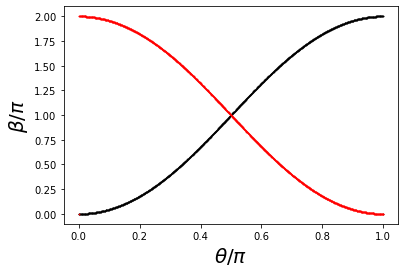

In [3]:
import matplotlib.pyplot as plt

plt.xlabel(r"$\theta/\pi$", fontsize = 20)
plt.ylabel(r"$\beta/\pi$", fontsize = 20)
plt.scatter(theta/np.pi, minberry/np.pi,s = 2, marker='.',  color = "black")
plt.scatter(theta/np.pi, upberry/np.pi, s = 2, marker='.', color="red")

In [4]:
def hamiltonian2(k):
    return np.array([[-k[2], k[0]-1j*k[1]], [k[0]+1j*k[1], k[2]]])

def mstate2(k):
    w, v = np.linalg.eig(hamiltonian2(k))
    
    j = np.argmin(w)
    return v[:,j]

def ustate2(k):
    w, v = np.linalg.eig(hamiltonian2(k))
    
    k = np.argmax(w)
    return v[:,k]

In [5]:
import numpy as np

k0    = 0.5
phi   = np.linspace(0, 2*np.pi, 10)
theta = np.linspace(0, np.pi, 1001)

k = np.zeros((1001, 10, 3), dtype = float)

for j in range(1001):
    for i in range(10):
        k[j, i, :]  = np.array([k0*np.sin(theta[j])*np.cos(phi[i]), k0*np.sin(theta[j])*np.sin(phi[i]), k0*np.cos(theta[j])])
    
minberry = np.zeros((1001,1), dtype = float)
upberry  = np.zeros((1001,1), dtype = float)

for j in range(1001):
    for i in range(10-1):
        minberry[j] = minberry[j] - np.imag(np.log(np.conjugate(mstate2(k[j, i, :])) @ mstate2(k[j, i+1, :])))
        upberry[j]  = upberry[j]  - np.imag(np.log(np.conjugate(ustate2(k[j, i, :])) @ ustate2(k[j, i+1, :])))
    minberry[j] = minberry[j] % (2*np.pi)
    upberry[j]  = upberry[j] % (2*np.pi)

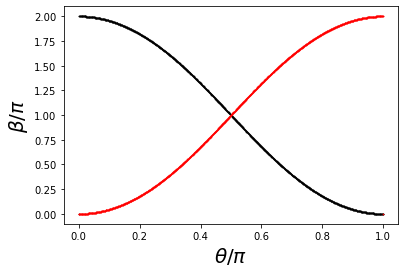

In [6]:
import matplotlib.pyplot as plt

plt.xlabel(r"$\theta/\pi$", fontsize = 20)
plt.ylabel(r"$\beta/\pi$", fontsize = 20)
plt.scatter(theta/np.pi, minberry/np.pi,s = 2, marker='.',  color = "black")
plt.scatter(theta/np.pi, upberry/np.pi, s = 2, marker='.', color="red")

In [16]:
def hamiltonian3(k):
    kplus = k[0]+1j*k[1]
    kminus= k[0]-1j*k[1]
    
    sigmax = np.array([[0, 1], [1, 0]])
    sigmay = np.array([[0, -1j], [1j, 0]])
    sigmaz = np.array([[1, 0], [0, -1]])
    
    return (kplus**2+0.5*kminus**2)*(sigmax+1j*sigmay)+(kminus**2+0.5*kplus**2)*(sigmax-1j*sigmay)+k[2]*sigmaz

def mstate3(k):
    w, v = np.linalg.eig(hamiltonian3(k))
    
    j = np.argmin(w)
    return v[:,j]

def ustate3(k):
    w, v = np.linalg.eig(hamiltonian3(k))
    
    k = np.argmax(w)
    return v[:,k]

In [17]:
import numpy as np

k0    = 0.5
phi   = np.linspace(0, 2*np.pi, 10)
theta = np.linspace(0, np.pi, 1001)

k = np.zeros((1001, 10, 3), dtype = float)

for j in range(1001):
    for i in range(10):
        k[j, i, :]  = np.array([k0*np.sin(theta[j])*np.cos(phi[i]), k0*np.sin(theta[j])*np.sin(phi[i]), k0*np.cos(theta[j])])
    
minberry = np.zeros((1001,1), dtype = float)
upberry  = np.zeros((1001,1), dtype = float)

for j in range(1001):
    for i in range(10-1):
        minberry[j] = minberry[j] - np.imag(np.log(np.conjugate(mstate3(k[j, i, :])) @ mstate3(k[j, i+1, :])))
        upberry[j]  = upberry[j]  - np.imag(np.log(np.conjugate(ustate3(k[j, i, :])) @ ustate3(k[j, i+1, :])))
    minberry[j] = minberry[j] % (2*np.pi)
    upberry[j]  = upberry[j] % (2*np.pi)

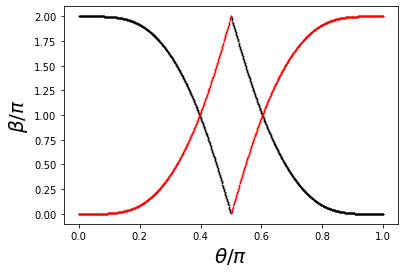

In [18]:
import matplotlib.pyplot as plt

plt.xlabel(r"$\theta/\pi$", fontsize = 20)
plt.ylabel(r"$\beta/\pi$", fontsize = 20)
plt.scatter(theta/np.pi, minberry/np.pi,s = 2, marker='.',  color = "black")
plt.scatter(theta/np.pi, upberry/np.pi, s = 2, marker='.', color="red")

In [19]:
import numpy as np

k0    = 2
phi   = np.linspace(0, 2*np.pi, 10)
theta = np.linspace(0, np.pi, 1001)

k = np.zeros((1001, 10, 3), dtype = float)

for j in range(1001):
    for i in range(10):
        k[j, i, :]  = np.array([k0*np.sin(theta[j])*np.cos(phi[i]), k0*np.sin(theta[j])*np.sin(phi[i]), k0*np.cos(theta[j])])
    
minberry = np.zeros((1001,1), dtype = float)
upberry  = np.zeros((1001,1), dtype = float)

for j in range(1001):
    for i in range(10-1):
        minberry[j] = minberry[j] - np.imag(np.log(np.conjugate(mstate3(k[j, i, :])) @ mstate3(k[j, i+1, :])))
        upberry[j]  = upberry[j]  - np.imag(np.log(np.conjugate(ustate3(k[j, i, :])) @ ustate3(k[j, i+1, :])))
    minberry[j] = minberry[j] % (2*np.pi)
    upberry[j]  = upberry[j] % (2*np.pi)

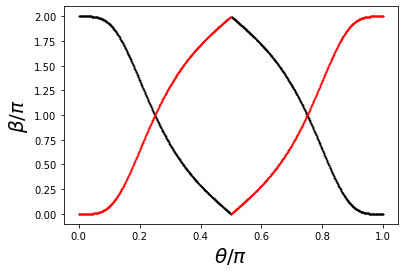

In [20]:
import matplotlib.pyplot as plt

plt.xlabel(r"$\theta/\pi$", fontsize = 20)
plt.ylabel(r"$\beta/\pi$", fontsize = 20)
plt.scatter(theta/np.pi, minberry/np.pi,s = 2, marker='.',  color = "black")
plt.scatter(theta/np.pi, upberry/np.pi, s = 2, marker='.', color="red")

In [3]:
def hamiltonian3(k):
    
    ex = 2
    gz = 0.8
    
    return np.array([[k[2]/np.sqrt(ex), 1/2*(-1j*k[1]*gz/np.sqrt(ex)-k[0])], [1/2*(1j*k[1]*gz/np.sqrt(ex)-k[0]), 0]])

def mstate3(k):
    w, v = np.linalg.eig(hamiltonian3(k))
    
    j = np.argmin(w)
    return v[:,j]

def ustate3(k):
    w, v = np.linalg.eig(hamiltonian3(k))
    
    k = np.argmax(w)
    return v[:,k]

In [8]:
import numpy as np

k0    = 0.5
phi   = np.linspace(0, 2*np.pi, 10)
theta = np.linspace(0, np.pi, 1001)

ex = 2
gz = 0.8

k = np.zeros((1001, 10, 3), dtype = float)

for j in range(1001):
    for i in range(10):
        kx    = k0*np.sin(theta[j])*np.cos(phi[i])
        ky    = k0*np.sin(theta[j])*np.sin(phi[i])
        omega = k0*np.cos(theta[j])
        
        kz    = omega*np.sqrt(ex)-(ex*kx**2+gz*ky**2)/4/omega
        
        k[j, i, :]  = np.array([kx, ky, kz])
    
minberry = np.zeros((1001,1), dtype = float)
upberry  = np.zeros((1001,1), dtype = float)

for j in range(1001):
    for i in range(10-1):
        minberry[j] = minberry[j] - np.imag(np.log(np.conjugate(mstate3(k[j, i, :])) @ mstate3(k[j, i+1, :])))
        upberry[j]  = upberry[j]  - np.imag(np.log(np.conjugate(ustate3(k[j, i, :])) @ ustate3(k[j, i+1, :])))
    minberry[j] = minberry[j] % (2*np.pi)
    upberry[j]  = upberry[j] % (2*np.pi)

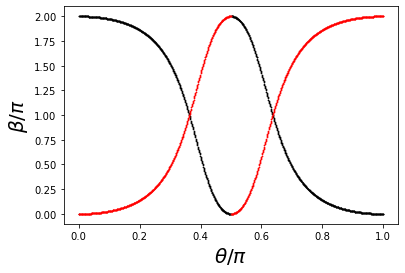

In [9]:
import matplotlib.pyplot as plt

plt.xlabel(r"$\theta/\pi$", fontsize = 20)
plt.ylabel(r"$\beta/\pi$", fontsize = 20)
plt.scatter(theta/np.pi, minberry/np.pi,s = 2, marker='.',  color = "black")
plt.scatter(theta/np.pi, upberry/np.pi, s = 2, marker='.', color="red")

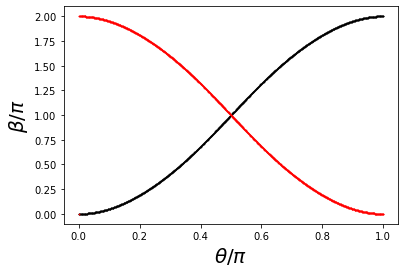

In [7]:
import matplotlib.pyplot as plt

plt.xlabel(r"$\theta/\pi$", fontsize = 20)
plt.ylabel(r"$\beta/\pi$", fontsize = 20)
plt.scatter(theta/np.pi, minberry/np.pi,s = 2, marker='.',  color = "black")
plt.scatter(theta/np.pi, upberry/np.pi, s = 2, marker='.', color="red")